In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns



In [3]:
columns =['input_dt',  'feed_plan_cd','feed_plan_nm', 'farm_no', 'farm_pig_no', 'feed_plan_pct', 'gyobae_dt', 'bunman_dt', 'wk_gubun', 'wk_dt','one_intake_kg', 'one_tm','one_kg', 'one_now_kg', 'two_tm', 'two_kg', 'two_now_kg', 'three_tm','three_kg', 'three_now_kg', 'four_tm', 'four_kg', 'four_now_kg','five_tm', 'five_kg', 'five_now_kg', 'warn_kg', 'min_kg', 'log_dt']  ##컬럼이름 설정
data_columns = columns + ['next_bunman_sancha','next_jae','next_chongsan','next_silsan','next_eudusu']   #컬럼추가  기존 컬럼에 다음 분만 산차와 재귀일령과 총산을 더함
data = pd.DataFrame(columns=data_columns) ###추가된 컬럼


In [4]:
ba_pi = pd.read_csv('/mnt/d/project/comars/pigplan_1387.csv')
ba_co = pd.read_csv('/mnt/d/project/comars/uit_feeding_hy_1387_바른양돈.csv')
print(data)
ba_co = ba_co[columns]#### ba_co(피그플랜 데이터에서 지정한 컬럼 명의 값만 가져오겠다)

pig_list = ba_pi['FARM_PIG_NO'].unique() 
#### ba_pi 데이터 중 FARM_PIG_NO의 종류를 하나씩 가져와 리스트 만들겠다
co_list = ba_co['farm_pig_no'].unique()
#### ba_co 데이터 중 farm_pig_no의 종류 중 하나씩 가져와 리스트를 만들겠다.

Empty DataFrame
Columns: [input_dt, feed_plan_cd, feed_plan_nm, farm_no, farm_pig_no, feed_plan_pct, gyobae_dt, bunman_dt, wk_gubun, wk_dt, one_intake_kg, one_tm, one_kg, one_now_kg, two_tm, two_kg, two_now_kg, three_tm, three_kg, three_now_kg, four_tm, four_kg, four_now_kg, five_tm, five_kg, five_now_kg, warn_kg, min_kg, log_dt, next_bunman_sancha, next_jae, next_chongsan, next_silsan, next_eudusu]
Index: []

[0 rows x 34 columns]


In [5]:
print(pig_list) ## FARM_PIG_NO의 넘버값


['9530' '1755' '4793' '1799' '9532' '1831' '2029' '1940' '2042' '2121'
 '2094' '2148' '2158' '9830' '4910Z' '2224' '2272' '2341' '1600' '2336'
 '4637' '2020' '2128' '7923' '5893' '5689' '0771' '0686' '0785' '0782'
 '0767' '0996' '0930' '0924ZZ' '0925' '0956' '5498' '0939' '0938' '9662'
 '7921' '8062' '8073' '8043' '7579' '8007' '6066ZZ' '6293' '7497' '6555'
 '7799' '6994' '6344' '7809' '6765' '6796' '6705' '6265' '7995' '7367'
 '6295' '6795' '7940' '6348' '0924Z' '6662' '8343' '6590' '6496' '6447'
 '6632' '7895' '6480' '8032Z' '6584' '8920ZZ' '6467' '6734' '6609' '8904'
 '8982' '7827' '6474' '8434' '7864' '7999' '6547' '2307' '8109' '6066Z'
 '6583' '6743' '4095' '4983' '8652' '8765' '4923' '9654' '1680' '5008'
 '1791' '5328' '9890' '0002' '0003' '0004' '0006' '0007' '0008' '0009'
 '0011' '0012' '0013' '0014' '0015' '0016' '0019' '0020' '0021' '0022'
 '0024' '0025' '0026' '0027' '0028' '0029' '0030' '0031' '0033' '4365'
 '7520' '4549' '4551' '4450' '4445' '4547' '4507' '3231' '9546' '33

In [6]:
for pig_id in tqdm(pig_list):
    if pig_id in co_list: ### co_list가 pig_id 안에 있다면
        tmp_co = ba_co[ba_co['farm_pig_no'] == pig_id] 
        #ba_co 데이터 중 컬럼 farm_pig_no와 pi_id 가 같은것만 ba_co에서 인덱싱 하여 tmp_co 에 입력 
        tmp_pi = ba_pi[ba_pi['FARM_PIG_NO'] == pig_id]
        #ba_pi 데이터중에서 ba_pi[FARM_PIG_NO]와 pig_id가 같은것만 입력
        gyobaes = list(tmp_pi['GYOBAE_DT'].unique())
        ### 두가지 데이터가 겹치는것을 tmp_pi라고 하는데 그 중에 'GYOBAE_DT'의 값만 뽑아서 리스트화
        gyobaes.sort()  ### 교배날짜를 정렬
        gyobaes_list = []
        for i in gyobaes: ### 교배의 날짜들을 가져와 i의 for에 넣는다.
            tmp_gyo = str(i) ## 교배의 날짜들을 문자열로 바꾼다.
            gyo_1 = tmp_gyo[:4]  ## 연도
            gyo_2 = tmp_gyo[4:6]  ## 월
            gyo_3 = tmp_gyo[6:]    ## 일
            gyobaes_list.append(gyo_1 + '-' + gyo_2 + '-' +gyo_3)
        for gyobae_num in range (len(gyobaes_list)) :
            tmp = tmp_co[ tmp_co['gyobae_dt'] == gyobaes_list[gyobae_num]]
            if tmp.empty: ## 데이터 값이 없다면 건너 가겠다
                pass
            else:
                tmp = tmp[tmp['wk_gubun'] == 'B']  ## tmp 중 값이 B 인 것만 가져와서 tmp로 입력
                if len(gyobaes_list) > gyobae_num+1:  ### len(gyobase_list)는 산차의 수를 의미함
                    silsan = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['SILSAN'].values[0] ### tmp_pi 의 교배날짜와 gyobase의 해당 산차의 다음이 같은것 중 실산 값을 가져오겠다
                    chongsan = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['CHONGSAN'].values[0] 
                    eudusu  = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['EUDUSU'].values[0] 
                    sancha  = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['BUNMAN_SANCHA'].values[0] 
                    jae     = tmp_pi[tmp_pi['GYOBAE_DT'] == gyobaes[gyobae_num+1]]['JAE'].values[0] 
                else : 
                     sancha = None
                     if sancha == None:
                         silsan = None
                         chongsan = None
                         eudusu = None
                         jae = None
                tmp['next_bunman_sancha'] = sancha
                tmp['next_silsan'] = silsan
                tmp['next_chongsan'] = chongsan
                tmp['next_eudusu'] = eudusu
                tmp['next_jae'] = jae
                tmp['day_now_kg'] = tmp['one_now_kg']+tmp['two_now_kg']+tmp['three_now_kg']+tmp['four_now_kg']+tmp['five_now_kg']
                ### 하루에 먹은 총량을 구하기 위해 모두 더함
                B_now_kg  = 0  ## 이때까지 먹은 총량
                for z in tmp['day_now_kg']: ## 그날 그날의 총량
                    B_now_kg += z               
                tmp['B_now_kg'] = B_now_kg 
                data = pd.concat([data,tmp], axis =0 )  
data = data.dropna()
test = data[['farm_pig_no','gyobae_dt','one_now_kg','two_now_kg','three_now_kg','four_now_kg',
             'five_now_kg','day_now_kg','B_now_kg','next_jae','next_chongsan','next_silsan',
             'next_eudusu']]  ## 13개의 컬럼만 가져옴



           
                            

100%|██████████| 589/589 [00:05<00:00, 114.92it/s] 


In [7]:
### 코드를 이해한기 위한 연습 gyobaes를 문자열로 바꾸어준 후 각 구간 별로 자르기
a = gyobaes[0]
print(a)

gyo_a = tmp_gyo[:4]
gyo_b = tmp_gyo[4:6]
gyo_c = tmp_gyo[6:]

print(gyo_a)
print(gyo_b)
print(gyo_c)

### empty 함수  
print(type(tmp))  
print(tmp.empty)  ## empty를 통하여 데이터가 있는 지 없는지를 알 수 있음

print(gyobae_num)

20211223
2021
12
23
<class 'pandas.core.frame.DataFrame'>
False
0


In [8]:
'''https://hwi-doc.tistory.com/entry/IQR-%EB%B0%A9%EC%8B%9D%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9D%B4%EC%83%81%EC%B9%98-%EB%8D%B0%EC%9D%B4%ED%84%B0Outlier-%EC%A0%9C%EA%B1%B0
get_outlier 와 관련된 자료'''
def get_outlier(df=None , column=None, weight=1.5):  ## IQR 방식을 이용한 이상치 제거(Outlier)
    ##target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)  ###데이터중 오름차순을 기준으로 위에서 부터 25분위를 가져오겠다
    quantile_75 = np.percentile(df[column].values, 75)  ###데이터중 오름차순을 기준으로 위에서 부터 75분위를 가져오겠다
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * weight
    lowest = quantile_25 - IQR_weight  
    hightest = quantile_75 + IQR_weight    
    outlier_idx = df[column][(df[column] < lowest) | (df[column]> hightest)]. index  ### 결과 값을 범위로 나타내준다.
    return outlier_idx 

In [9]:
outlier_idx = get_outlier(df = test, column = 'next_chongsan',weight=1.5)
test.drop(outlier_idx, axis = 0, inplace = True)


/tmp/ipykernel_398/252941534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(outlier_idx, axis = 0, inplace = True)


In [10]:
test = test[test['B_now_kg'] != 0]    ### test 는 B_now_kg의 값(그 개체가 먹은 총량)이 0이 아닌 데이터
test.drop_duplicates(['farm_pig_no','gyobae_dt']) ### 중복값을 제거  


,farm_pig_no,gyobae_dt,one_now_kg,two_now_kg,three_now_kg,four_now_kg,five_now_kg,day_now_kg,B_now_kg,next_jae,next_chongsan,next_silsan,next_eudusu
1323,58-125,2017-09-04,2,2,2,2,2,10.0,1070.0,5.0,19,15,11
5109,58-125,2018-01-23,2,2,2,2,2,10.0,524.0,5.0,16,11,10
1985,58-72,2017-10-02,2,2,2,2,2,10.0,681.0,5.0,6,1,0
17,58-46,2017-07-10,4,2,2,4,4,16.0,1010.0,117.0,5,5,0
626,58-80,2017-08-07,2,2,2,2,2,10.0,916.0,4.0,12,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34464,100-70,2021-04-14,4,6,6,4,2,22.0,830.0,5.0,8,7,11
34521,00-00,2021-04-12,2,2,2,6,2,14.0,632.0,5.0,4,4,6
34511,100-53,2021-04-13,2,2,6,2,2,14.0,592.0,32.0,17,16,7
35277,100-87,2021-05-12,0,0,0,0,6,6.0,734.0,6.0,5,5,5


##drop_duplicates 참고자료
https://rfriend.tistory.com/266

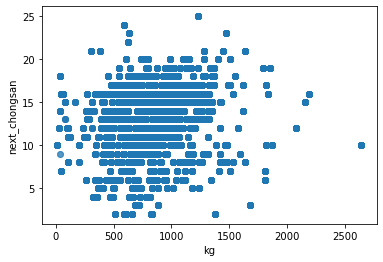

상관계수 :  0.1494388523391246


In [11]:
X = test['B_now_kg'].astype('int')  ##속성을 int 값으로 바꾼다
Y = test['next_chongsan'].astype('int')
plt.scatter(X,Y, alpha=0.5)
plt.xlabel('kg')
plt.ylabel('next_chongsan')
plt.show()
print('상관계수 : ',np.corrcoef(X,Y)[0,1])  

### 

In [12]:
print(stats.pearsonr(X,Y))
print(stats.spearmanr(X,Y))
print(stats.kendalltau(X,Y))

(0.14943885233912405, 5.5050547934479845e-80)
SpearmanrResult(correlation=0.19289114156200643, pvalue=5.737038852131025e-133)
KendalltauResult(correlation=0.1362925207642634, pvalue=1.3480966372035643e-136)


In [13]:
##/mnt/d/project/comars/pigplan_test.ipynb

In [15]:
data = pd.read_csv('/mnt/d/project/comars/pigplan_1387.csv')
print(data)

      FARM_NO FARM_PIG_NO  BUNMAN_SANCHA  GYOBAE_DT  BUNMAN_DT  CHONGSAN  \
0        1387        9530              1   20100727   20101113         6   
1        1387        9530              2   20110128   20110522        14   
2        1387        9530              3   20110628   20111021        15   
3        1387        9530              4   20120102   20120424        17   
4        1387        9530              5   20120529   20120921        13   
...       ...         ...            ...        ...        ...       ...   
3074     1387      102-46              1   20211223   20220417         9   
3075     1387      101-22              1   20211224   20220417        12   
3076     1387      102-78              1   20211224   20220413        10   
3077     1387      102-34              1   20211222   20220414         6   
3078     1387      102-38              1   20211223   20220418        12   

      SILSAN  EUDUSU  EUKG  CHOGYOBAE   JAE  
0          3       7  33.6        NaN   N

In [16]:
data.columns

Index(['FARM_NO', 'FARM_PIG_NO', 'BUNMAN_SANCHA', 'GYOBAE_DT', 'BUNMAN_DT',
       'CHONGSAN', 'SILSAN', 'EUDUSU', 'EUKG', 'CHOGYOBAE', 'JAE'],
      dtype='object')

In [19]:
data_date = data.GYOBAE_DT

In [20]:
print(type(data_date))

<class 'pandas.core.series.Series'>


In [22]:
a=data.iloc[3,3]

20120102

In [24]:
print(type(a))

<class 'numpy.int64'>


In [25]:
a=str(a)

In [26]:
print(a)

20211223


In [ ]:
def split_date(self, first)


In [27]:
####문자열 인덱싱을 위한연습

mystring = 'hello world'
len(mystring)


11

In [29]:
print(mystring[0:5])

hello


In [31]:
print(mystring[6:])

world


In [42]:
## 만들고자 하는 함수 문자열 데이값이 주지면 년월일을 제시해주는 연습

class MyClass:
    name = "MyName"
    def print(self, str):
        print(self.name + '' + str)

x = MyClass()
x.print("Hello, Python")


MyNameHello, Python


In [49]:
class Person:
    def greeting(self):
        print('Hello')

In [50]:
james =  Person()

In [51]:
james.greeting()

Hello


In [52]:
a = int(10)
b = list(range(10))
c  = dict(x=10, y=20)

In [54]:
b = list(range(10))
b.append(20)
b

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20]

In [55]:
###특정 클래스의 인스턴스인지 확인하기
class Person:
    pass

james = Person()
isinstance(james, Person)

True

In [ ]:
### 내가 만들고 싶은 함수 문자열데이터를 년 월 일 로 자르는 함수

class Split_date:
    def year(self, a):
        year()        

In [56]:
''' lambda 람다

lambda 매개변수 : 표현식'''

(lambda x,y: x+y)(10,20)



30

In [68]:
print((lambda a : str(a)[0:4])(20220612)) ### 데이터에서 날짜만 가져옴
(lambda b :  str(b)[4:6])(20220612) ### 데이터에서 월만 가져옴




2022


'06'